In [35]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.special.orthogonal import p_roots

/tmp/ipykernel_96635/2836400169.py:4: DeprecationWarning: Please use `p_roots` from the `scipy.special` namespace, the `scipy.special.orthogonal` namespace is deprecated.
  from scipy.special.orthogonal import p_roots


In [62]:
x=np.linspace(-1,1,100000)
global k
k=(x[-1]-x[0])/len(x)

def xn(x,n):
    return x**n

In [63]:

z= 7 # enter the order of legendre polynomials you wish to generate
v=np.zeros((z,100000))
for i in range(z):
    v[i]=xn(x,i)
u=np.zeros((z,100000))


In [64]:
import scipy.integrate as inte #simpson integration

def innerproduct(a,b,k): #where k is the spacing difference between the points
    p=a*b
    return inte.simpson(y=p,dx=k) 

In [65]:
def grsm(v,u,n,innerproduct): # the grahm-schmidt method of generation of orthogoal basis
    u[0]=v[0]/(innerproduct(v[0],v[0],k) **.5)
    for i in range(1,n):
        m=v[i]
        #print(np.shape(m))
        for j in range(i):
            m -= innerproduct(v[i],u[j],k)*u[j] 
            
        u[i]=m/(innerproduct(m,m,k)**.5)
    return u

In [66]:
q=grsm(v,u,z,innerproduct)

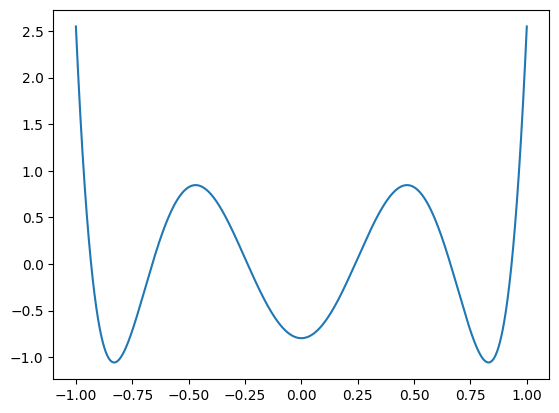

In [67]:
plt.plot(x,q[6])

In [68]:
legsix=q[6]

In [71]:
a=[]
for i in range(len(legsix)):
    
    if abs(legsix[i]-0)<.0001:
        a.append(i)

In [72]:
print(len(a))

6


In [73]:
a

[16939, 38068, 38069, 61930, 61931, 83060]

In [77]:
x,w=p_roots(3)

In [78]:
def fn(x):
    return x**2

In [79]:
def gquadint(x,w,fn):
    k=0
    for i in range(len(x)):
        k+= w[i]*fn(x[i])
    return k


    


In [80]:
m=gquadint(x,w,fn)

In [84]:
def transformation(x,w,fn,a,b):
    k=0
    for i in range(len(x)):
        xz=((b-a)*x[i]+(b+a))/2
        k+= w[i]*fn(xz)*(b-a)/2
    return k
    


In [85]:
p=transformation(x,w,fn,0,3)

In [86]:
p

9.000000000000002